# Functions and classes to load and manipulate datasets

This notebook shows how to use the functions and classes in [`datasets.py`](datasets.py) to load and manipulate the data that we'll use.

## Package imports

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import seaborn  # Makes the default style of the plots nicer

In [3]:
from datasets import fetch_crust1, fetch_assumpcao_moho_points

## Crustal thickness 

Function `fetch_assumpcao_moho_points` loads the seismic crustal thickness dataset of [Assumpção et al. (2012)](http://dx.doi.org/10.1016%2Fj.tecto.2012.11.014). The data are provided in the `Moho_Map_SAm2013_data.tar.gz` archive in the `data` folder. These are point estimates of crustal thickness derived from various seismic sources.

In [4]:
data = fetch_assumpcao_moho_points('../data/Moho_Map_SAm2013_data.tar.gz', todepth=True)
# todepth=True will convert crustal thickness to Moho depth
lat, lon, height, moho_depth, error = data

Lets make a plot of the dataset.

In [5]:
area = (-60, 20, -90, -30)
bm = Basemap(projection='cyl', 
             llcrnrlon=area[2], urcrnrlon=area[3], llcrnrlat=area[0], urcrnrlat=area[1],
             lon_0=0.5*(area[2] + area[3]), lat_0=0.5*(area[1] + area[0]), 
             resolution='l')

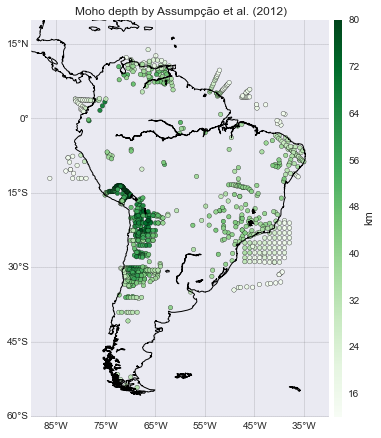

In [6]:
x, y = bm(lon, lat)

plt.figure(figsize=(7, 6))
plt.title(u'Moho depth by Assumpção et al. (2012)')
bm.scatter(x, y, c=0.001*moho_depth, cmap='Greens')
plt.colorbar(pad=0.01, aspect=50).set_label('km')
bm.drawmeridians(np.arange(-85, -20, 10), labels=[0, 0, 0, 1], linewidth=0.2)
bm.drawparallels(np.arange(-60, 30, 15), labels=[1, 0, 0, 0], linewidth=0.2)
bm.drawcoastlines()
plt.tight_layout()

## The CRUST1.0 model

The `fetch_crust1` function loads the model from the `tar.gz` archive. It returns a `Crust1` class that allows us to manipulate the [CRUST1.0 model](http://igppweb.ucsd.edu/~gabi/crust1.html) by getting different physical properties as numpy arrays and providing some combinations of properties (like total sediment thickness, Moho depth, slicing the model, etc).

In [7]:
model = fetch_crust1('../data/crust1.0.tar.gz')

Lets see what layer the model makes available to us.

In [8]:
model.layers

['water',
 'ice',
 'upper_sediments',
 'middle_sediments',
 'lower_sediments',
 'upper_crust',
 'middle_crust',
 'lower_crust',
 'mantle']

Each layer has the `density`, `vp`, and `vs` attributes that return 2D numpy arrays of the corresponding physical property.

In [9]:
model.water.density

array([[ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       ..., 
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
       [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.]])

In [10]:
model.upper_crust.vp

array([[ 5900.,  5900.,  5900., ...,  5900.,  5900.,  5900.],
       [ 5900.,  5900.,  5900., ...,  5900.,  5900.,  5900.],
       [ 5900.,  5900.,  5900., ...,  5900.,  5900.,  5900.],
       ..., 
       [ 5000.,  5000.,  5000., ...,  5000.,  5000.,  5000.],
       [ 5000.,  5000.,  5000., ...,  5000.,  5000.,  5000.],
       [ 5000.,  5000.,  5000., ...,  5000.,  5000.,  5000.]])

You can also access the physical properties directly from the model object to get a 3D array of the property of all layers.

In [11]:
model.density

array([[[ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
        [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
        [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
        ..., 
        [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
        [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.],
        [ 1020.,  1020.,  1020., ...,  1020.,  1020.,  1020.]],

       [[  920.,   920.,   920., ...,   920.,   920.,   920.],
        [  920.,   920.,   920., ...,   920.,   920.,   920.],
        [  920.,   920.,   920., ...,   920.,   920.,   920.],
        ..., 
        [  920.,   920.,   920., ...,   920.,   920.,   920.],
        [  920.,   920.,   920., ...,   920.,   920.,   920.],
        [  920.,   920.,   920., ...,   920.,   920.,   920.]],

       [[ 2260.,  2260.,  2260., ...,  2260.,  2260.,  2260.],
        [ 2260.,  2260.,  2260., ...,  2260.,  2260.,  2260.],
        [ 2260.,  2260.,  2260., ...,  2260.,  2260.,  2260.],
        ..., 
        [

A use of this feature is to calculate things across all layers, like the mean crustal density (layers 5-7):

In [12]:
model.density[5:8].mean(0)

array([[ 2773.33333333,  2773.33333333,  2773.33333333, ...,
         2773.33333333,  2773.33333333,  2773.33333333],
       [ 2773.33333333,  2773.33333333,  2773.33333333, ...,
         2773.33333333,  2773.33333333,  2773.33333333],
       [ 2773.33333333,  2773.33333333,  2773.33333333, ...,
         2773.33333333,  2773.33333333,  2773.33333333],
       ..., 
       [ 2816.66666667,  2816.66666667,  2816.66666667, ...,
         2816.66666667,  2816.66666667,  2816.66666667],
       [ 2816.66666667,  2816.66666667,  2816.66666667, ...,
         2816.66666667,  2816.66666667,  2816.66666667],
       [ 2816.66666667,  2816.66666667,  2816.66666667, ...,
         2816.66666667,  2816.66666667,  2816.66666667]])

The `Crust1` class also provides some other attributes that are derived from the model layers, like total sediment thickness and Moho depth.

In [13]:
model.sediment_thickness

array([[ 1500.,  1500.,  1500., ...,  1500.,  1500.,  1500.],
       [  400.,   400.,   400., ...,   300.,   300.,   300.],
       [  300.,   300.,   300., ...,   400.,   400.,   300.],
       ..., 
       [ 1800.,  1800.,  1800., ...,  1800.,  1800.,  1800.],
       [ 1000.,  1000.,  1000., ...,  1000.,  1000.,  1000.],
       [ 1300.,  1300.,  1300., ...,  1500.,  1500.,  1500.]])

In [14]:
model.moho_depth

array([[ 36150.,  36150.,  36150., ...,  36130.,  36130.,  36140.],
       [ 37910.,  37910.,  37910., ...,  37930.,  37930.,  37930.],
       [ 39950.,  39950.,  39960., ...,  39980.,  39980.,  39980.],
       ..., 
       [ 12650.,  12650.,  12640., ...,  12740.,  12690.,  17000.],
       [ 11380.,  11400.,  11410., ...,  11300.,  11330.,  15930.],
       [ 11750.,  11740.,  11720., ...,  12760.,  12750.,  16230.]])

Lets make plots of these two properties for the entire Earth.

In [15]:
bm = Basemap(projection='moll', lon_0=0, resolution='c')

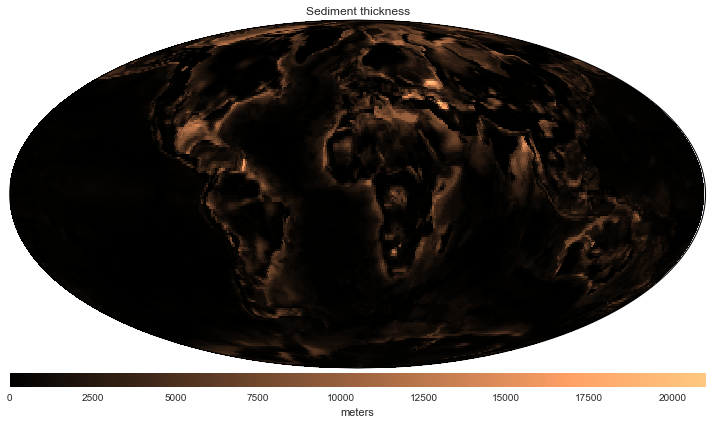

In [16]:
x, y = bm(model.lon, model.lat)

plt.figure(figsize=(10, 7))
plt.title('Sediment thickness')
bm.pcolormesh(x, y, model.sediment_thickness, cmap='copper')
plt.colorbar(pad=0.01, orientation='horizontal', aspect=50).set_label('meters')
plt.tight_layout()

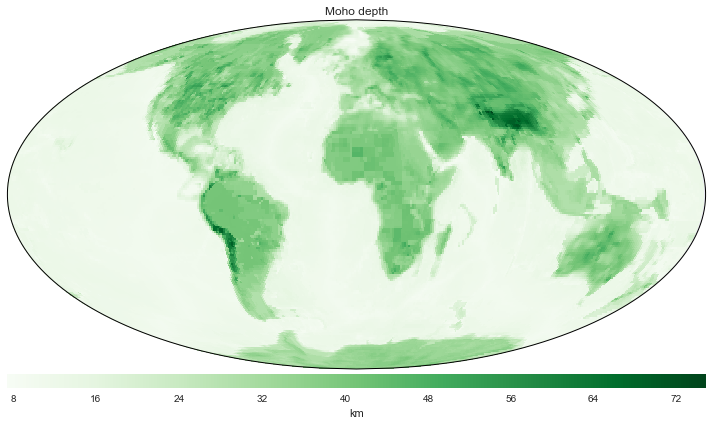

In [17]:
plt.figure(figsize=(10, 7))
plt.title('Moho depth')
bm.pcolormesh(x, y, 0.001*model.moho_depth, cmap='Greens')
plt.colorbar(pad=0.01, orientation='horizontal', aspect=50).set_label('km')
plt.tight_layout()

We can cut the model to get only parts that we want. For example, let's get only South America.

In [18]:
sa = model.cut((-65, 20, -90, -30))

The cut part is also a `Crust1` object, so you can do all of the above with it as well.

In [19]:
sa.lower_crust.vs

array([[ 4050.,  4050.,  4050., ...,  4050.,  4050.,  4050.],
       [ 4050.,  4050.,  4050., ...,  4050.,  4050.,  4050.],
       [ 4050.,  4050.,  4050., ...,  4050.,  4050.,  4050.],
       ..., 
       [ 3870.,  3870.,  4050., ...,  4050.,  4050.,  4050.],
       [ 3870.,  3870.,  3900., ...,  4050.,  4050.,  4050.],
       [ 3870.,  3870.,  4100., ...,  4050.,  4050.,  4050.]])

In [20]:
area = sa.area
bm = Basemap(projection='cyl', 
             llcrnrlon=area[2], urcrnrlon=area[3], llcrnrlat=area[0], urcrnrlat=area[1],
             lon_0=0.5*(area[2] + area[3]), lat_0=0.5*(area[1] + area[0]), 
             resolution='l')

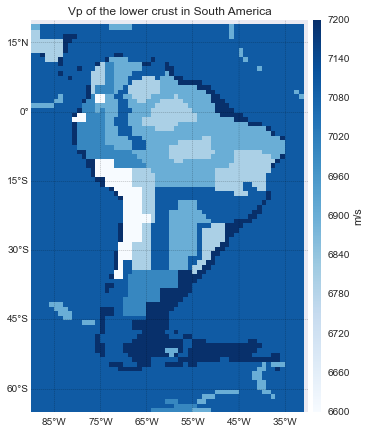

In [21]:
x, y = bm(sa.lon, sa.lat)
plt.figure(figsize=(7, 6))
plt.title('Vp of the lower crust in South America')
bm.pcolormesh(x, y, sa.lower_crust.vp, cmap='Blues')
plt.colorbar(pad=0.01, aspect=50).set_label(u'm/s')
bm.drawmeridians(np.arange(-85, -20, 10), labels=[0, 0, 0, 1], linewidth=0.2)
bm.drawparallels(np.arange(-60, 30, 15), labels=[1, 0, 0, 0], linewidth=0.2)
plt.tight_layout()